In [2]:
import pandas as pd

In [3]:
df_notas = pd.read_csv('ratings.csv')
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df_notas.shape

(100836, 4)

In [5]:
df_notas.columns = "usuarioID", "filmeID", "nota", "momento"

In [6]:
df_notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df_notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
df_notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

<Axes: ylabel='Frequency'>

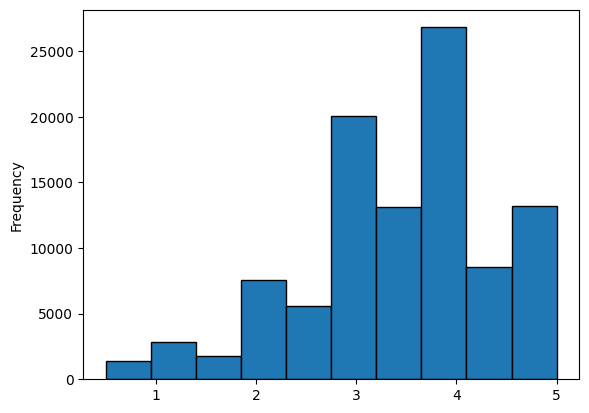

In [9]:
df_notas.nota.plot(kind='hist', edgecolor='black')

In [10]:
print(df_notas.nota.mean())
print(df_notas.nota.median())

3.501556983616962
3.5


In [11]:
df_notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [12]:
import seaborn as sns

<Axes: ylabel='nota'>

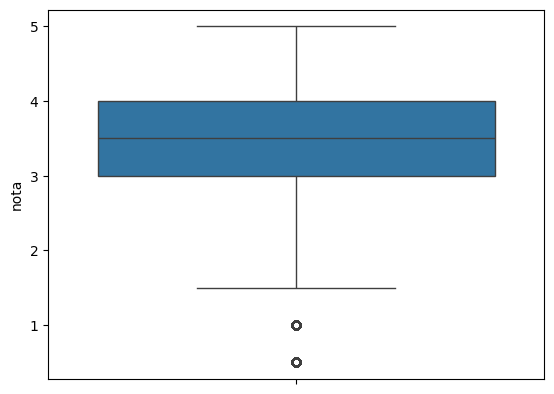

In [13]:
sns.boxplot(df_notas.nota)

In [15]:
df_filmes = pd.read_csv('movies.csv')
df_filmes.columns = ["filmeid", "titulo", "genero"]
df_filmes.head()

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas por filme

In [21]:
df_notas.query("filmeID == 1").nota.mean()

3.9209302325581397

In [22]:
df_notas.query("filmeID == 2").nota.mean()

3.4318181818181817

In [25]:
medias_por_filme = df_notas.groupby("filmeID").mean() ["nota"]
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

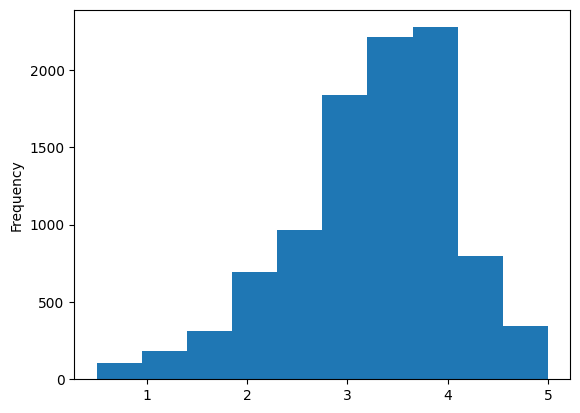

In [30]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

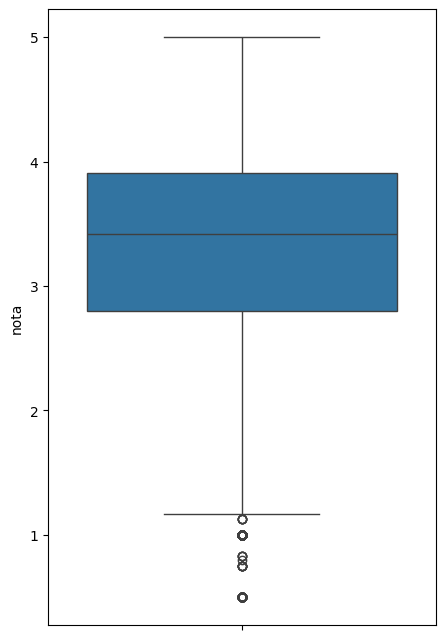

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 8))

sns.boxplot(medias_por_filme)

In [32]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

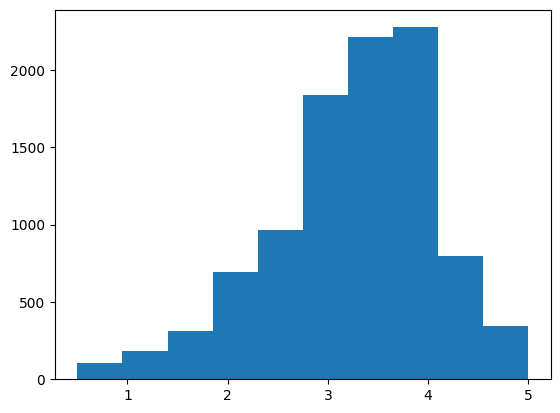

In [35]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)